In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

In [2]:
# 데이터를 불러옵니다.
df = pd.read_csv('./data/anti_depressant_prescription.csv')

In [3]:
# 데이터의 첫 다섯 줄을 출력합니다.
print(df.shape)
df.head()

(160683, 15)


,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2017,62,7819529,2,1,12,41,20170711,242901ATB,2.0,1,28,40.0,2240,20181126
1,2017,62,35429246,2,1,12,41,20170808,242901ATB,2.0,1,28,40.0,2240,20181126
2,2017,62,37765102,5,1,12,41,20170609,242901ATB,2.0,1,28,40.0,2240,20181126
3,2017,62,59976553,5,1,12,41,20170911,242901ATB,2.0,1,28,40.0,2240,20181126
4,2017,107,21130660,1,1,11,47,20171017,495501ACE,1.0,1,30,404.0,12120,20181126


In [4]:
# 처방내역일련번호로 그룹화하여 처방된 약품의 개수를 세어봅니다.
pd.DataFrame(df.groupby('처방내역일련번호')['약품일반성분명코드'].count().value_counts())

,count
약품일반성분명코드,
1,118338
2,16650
3,2546
4,287
5,41
6,9


### 예시 확인

In [5]:
df[df['처방내역일련번호'] == 2630689]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
17284,2017,103504,2630689,4,1,14,28,20170609,203401ATB,1.0,1,28,49.0,1372,20181126
17285,2017,103504,2630689,5,1,14,28,20170609,203401ATB,2.0,1,28,49.0,2744,20181126
17286,2017,103504,2630689,7,1,14,28,20170609,242902ATB,4.0,1,28,84.0,9408,20181126
17287,2017,103504,2630689,8,1,14,28,20170609,495501ACE,1.0,1,28,404.0,11312,20181126
17288,2017,103504,2630689,10,1,14,28,20170609,196202ATB,1.0,1,28,935.0,26180,20181126


In [6]:
df[df['가입자일련번호'] == 103504]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
17279,2017,103504,298526,4,1,14,28,20170504,203401ATB,1.0,1,28,49.0,1372,20181126
17280,2017,103504,298526,5,1,14,28,20170504,203401ATB,2.0,1,28,49.0,2744,20181126
17281,2017,103504,298526,7,1,14,28,20170504,242902ATB,4.0,1,28,84.0,9408,20181126
17282,2017,103504,298526,8,1,14,28,20170504,495502ACE,1.0,1,28,624.0,17472,20181126
17283,2017,103504,298526,10,1,14,28,20170504,196202ATB,1.0,1,28,935.0,26180,20181126
17284,2017,103504,2630689,4,1,14,28,20170609,203401ATB,1.0,1,28,49.0,1372,20181126
17285,2017,103504,2630689,5,1,14,28,20170609,203401ATB,2.0,1,28,49.0,2744,20181126
17286,2017,103504,2630689,7,1,14,28,20170609,242902ATB,4.0,1,28,84.0,9408,20181126
17287,2017,103504,2630689,8,1,14,28,20170609,495501ACE,1.0,1,28,404.0,11312,20181126
17288,2017,103504,2630689,10,1,14,28,20170609,196202ATB,1.0,1,28,935.0,26180,20181126


In [7]:
# 한 환자당 처방전의 개수를 세어봅니다.
df.groupby('가입자일련번호')['처방내역일련번호'].count().describe()

count    33344.000000
mean         4.818948
std          6.553291
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        152.000000
Name: 처방내역일련번호, dtype: float64

한 사람당 여러번의 처방전이 발부될 수 있고, 그 처방전들 중 같은 약을 포함하기도하고 다른 약을 포함하기도 한다는 것을 볼 수 있습니다.

두 종류의 약물이 같이 처방된 빈도 수를 계산할 때, 같은 사람에게 여러번 처방된 케이스는 같이 처방된 횟수로 나누어야 한다고 판단했습니다.

그렇지 않으면 한사람에게 여러번 처방된 약들이 weight에 불평등한 영향을 미칠 것으로 예상됩니다.

---

In [12]:
# 
ingredient_list = df['약품일반성분명코드'].unique()

# 같이 처방된 약품을 adjacency matrix로 표현합니다.
adjacency_matrix_zeros = pd.DataFrame(0, index=ingredient_list, columns=ingredient_list)

# 임시 adjacency matrix를 만듭니다.
adjacency_matrix = adjacency_matrix_zeros.copy()
temp_adjacency_matrix = adjacency_matrix_zeros.copy()

In [38]:
ing_list = df['약품일반성분명코드'].unique()[:5]

adj_matrix_zeros = pd.DataFrame(0, index=ing_list, columns=ing_list)

adj_matrix = adj_matrix_zeros.copy()
tmp_matrix = adj_matrix_zeros.copy()

df_small = df[df['약품일반성분명코드'].isin(ing_list)]

In [39]:
for uid in df_small["가입자일련번호"].unique():
    # clear the temp_adjacency_matrix
    tmp_matrix = adj_matrix_zeros.copy()

    #
    pres_list = df_small[df_small["가입자일련번호"] == uid]["처방내역일련번호"].unique()

    for prescription_id in pres_list:
        prescription = df_small[df_small["처방내역일련번호"] == prescription_id]["약품일반성분명코드"].unique()
        
        for i in range(len(prescription)):
            for j in range(i + 1, len(prescription)):
                tmp_matrix[prescription[i]][prescription[j]] += 1
                tmp_matrix[prescription[j]][prescription[i]] += 1

    # 처방전의 개수로 나누어 정규화합니다.
    adj_matrix += tmp_matrix / len(pres_list)

In [40]:
adj_matrix

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB
242901ATB,0.000000,18.154304,52.940102,32.423052,27.679121
495501ACE,18.154304,0.000000,3.723016,75.716908,12.150376
474801ATB,52.940102,3.723016,0.000000,20.176806,9.572463
107501ATB,32.423052,75.716908,20.176806,0.000000,10.303175
196201ATB,27.679121,12.150376,9.572463,10.303175,0.000000


In [ ]:
for uid in df["가입자일련번호"].unique():
    n_prescription = 0
    # clear the temp_adjacency_matrix
    temp_adjacency_matrix = adjacency_matrix_zeros.copy()

    for prescription_id in df[df["가입자일련번호"] == uid]["처방내역일련번호"].unique():
        n_prescription += 1
        prescription = df[df["처방내역일련번호"] == prescription_id]["약품일반성분명코드"].unique()
        
        for i in range(len(prescription)):
            for j in range(i + 1, len(prescription)):
                temp_adjacency_matrix[prescription[i]][prescription[j]] += 1
                temp_adjacency_matrix[prescription[j]][prescription[i]] += 1

        # 처방전의 개수로 나누어 정규화합니다.
        adjacency_matrix += temp_adjacency_matrix / n_prescription

In [14]:
temp_adjacency_matrix.iloc[4, 4] = 1
temp = temp_adjacency_matrix + adjacency_matrix_zeros
temp.iloc[:5, :5]

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB
242901ATB,0,0,0,0,0
495501ACE,0,0,0,0,0
474801ATB,0,0,0,0,0
107501ATB,0,0,0,0,0
196201ATB,0,0,0,0,1


In [10]:
adjacency_matrix.iloc[:5, :5]

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB
242901ATB,0.000000e+00,3.535446e-70,0.0,0.000000e+00,1.706767e-71
495501ACE,3.535446e-70,0.000000e+00,0.0,4.423907e-05,0.000000e+00
474801ATB,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
107501ATB,0.000000e+00,4.423907e-05,0.0,0.000000e+00,1.649842e-311
196201ATB,1.706767e-71,0.000000e+00,0.0,1.649842e-311,0.000000e+00


In [101]:
adjacency_matrix.iloc[:5, :5]

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB
242901ATB,0.0,112.0,144.0,178.0,106.0
495501ACE,82.0,0.0,14.0,484.0,100.0
474801ATB,268.0,30.0,0.0,206.0,62.0
107501ATB,184.0,282.0,58.0,0.0,50.0
196201ATB,174.0,88.0,40.0,44.0,0.0


Adjacency matrix가 대각선을 기준으로 대칭이 아닌 것이 확인됩니다. \
이는 처방전 내에 약물이 표기되는 순서에 따라 다른 것으로 예상됩니다. \
그러므로 이부분을 해결하도록 코드를 수정하겠습니다.

또한 같은 성분의 약물이 중복적으로 처방되는 경우도 있어 이부분도 고려해 주겠습니다.

In [103]:
# adjacency matrix의 값들을 제거합니다
adjacency_matrix.values[:] = 0

# 열과 행은 처방된 약품을 나타내며, (i, j)번째 원소는 처방된 약품 i와 j가 같이 처방된 횟수를 나타냅니다.
for prescription in df.groupby('처방내역일련번호')['약품일반성분명코드'].apply(list):  # self-loop도 고려
    prescription = sorted(prescription)  # 매트릭스 한쪽에만 정리되도록 정렬
    for i in range(len(prescription)):
        for j in range(i + 1, len(prescription)):
            adjacency_matrix[prescription[i]][prescription[j]] += 1
            adjacency_matrix[prescription[i]][prescription[j]] += 1

In [104]:
# 매트릭스를 대칭으로 만들어줍니다.
adjacency_matrix = adjacency_matrix + adjacency_matrix.T
np.fill_diagonal(adjacency_matrix.values, adjacency_matrix.values.diagonal() / 2)
adjacency_matrix.iloc[:5, :5]

,242901ATB,495501ACE,474801ATB,107501ATB,196201ATB
242901ATB,44.0,202.0,416.0,370.0,284.0
495501ACE,202.0,38.0,48.0,770.0,192.0
474801ATB,416.0,48.0,82.0,274.0,102.0
107501ATB,370.0,770.0,274.0,538.0,94.0
196201ATB,284.0,192.0,102.0,94.0,56.0


In [ ]:
# adjacency matrix를 networkx 그래프로 변환합니다.
G = nx.from_pandas_adjacency(adjacency_matrix)

def my_draw(G, pos, **my_opts):
    options = { #Common drawing options
    'font_size': 8,
    'node_size': 50,
    'node_color': 'lightgreen',
    'edgecolors': 'black'
    }
    plt.figure(figsize=(10,10))
    options.update(my_opts)
    nx.draw(G, pos, **options)

C:\Users\YuHan\AppData\Local\Temp\ipykernel_15988\165776262.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)


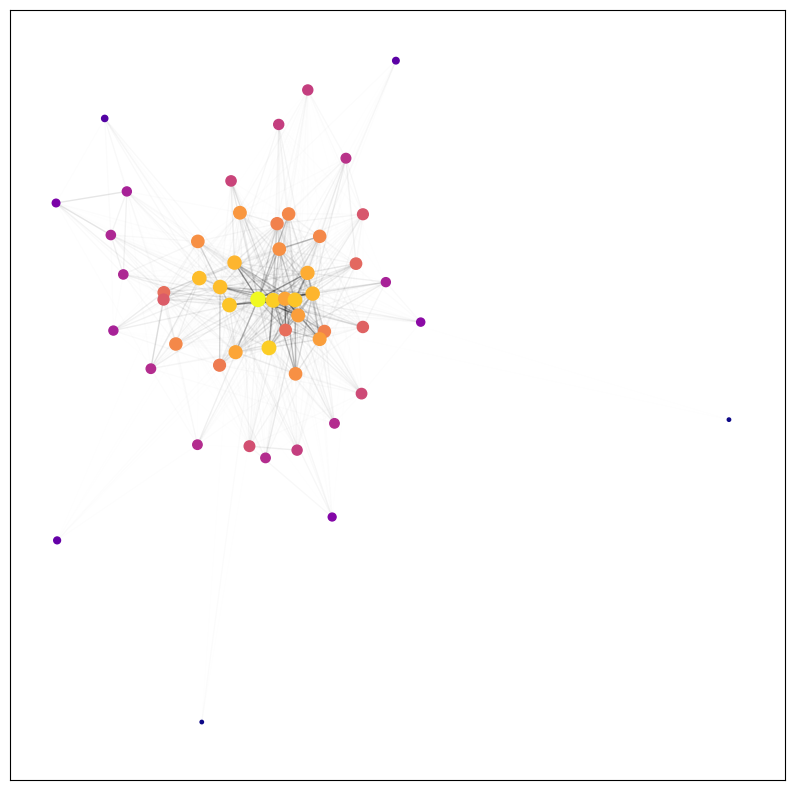

In [105]:
# 그래프를 그립니다.
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

# 노드의 크기를 degree centrality에 비례하게 설정합니다.
node_size = [G.degree(node) * 2 for node in G.nodes]

# 노드의 색을 degree centrality에 비례하게 설정합니다.
node_color = [G.degree(node) for node in G.nodes]

# 엣지의 투명도를 weight에 비례하게 설정합니다.
max_weight = max([d['weight'] for u, v, d in G.edges(data=True)])
for edge in G.edges(data="weight"):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma)
plt.show()

C:\Users\YuHan\AppData\Local\Temp\ipykernel_15988\3128170758.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)


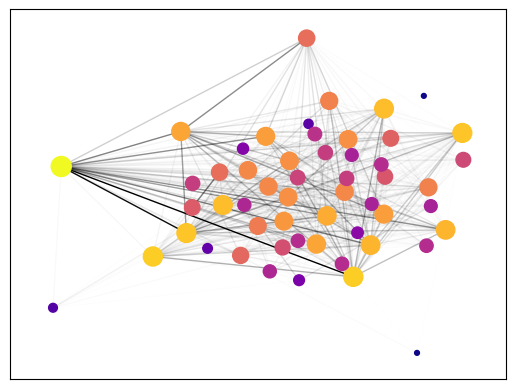

In [99]:
pos = nx.kamada_kawai_layout(G) #positions for all nodes

# 노드의 크기를 degree centrality에 비례하게 설정합니다.
node_size = [G.degree(node) * 4 for node in G.nodes]

# 노드의 색을 degree centrality에 비례하게 설정합니다.
node_color = [G.degree(node) for node in G.nodes]

# 엣지의 투명도를 weight에 비례하게 설정합니다.
max_weight = max([d['weight'] for u, v, d in G.edges(data=True)])
for edge in G.edges(data="weight"):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], alpha=edge[2] / max_weight)

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma)
plt.show()

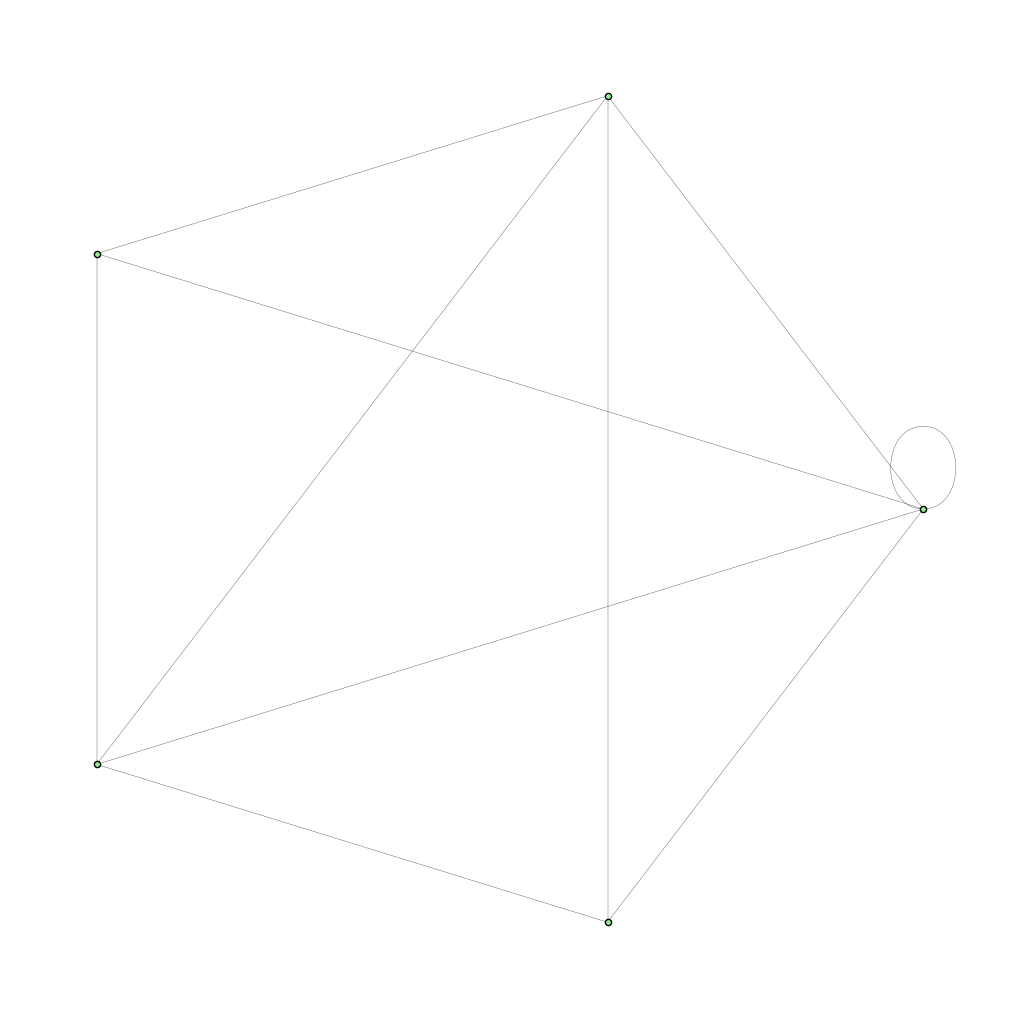

In [92]:
pos = nx.circular_layout(G) #positions for all nodes
my_draw(G, pos, node_size=20, width=0.2)